In [1]:
# 1. Setup and Imports
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
# 2. Load Data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('gender_submission.csv')

print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (891, 12)
Test shape: (418, 11)


🚢 Titanic Dataset EDA
Train shape: (891, 12), Test shape: (418, 11)
Combined shape: (891, 12)

🔍 Missing Values (%):
Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64


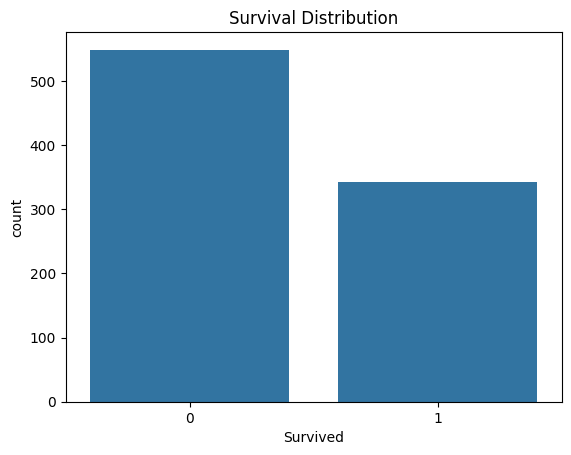

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN



🧑‍✈️ Title Frequencies:
Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64


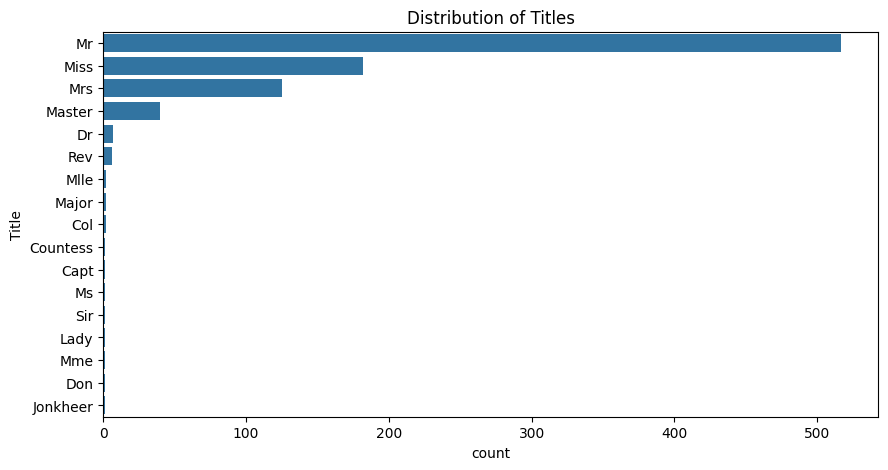

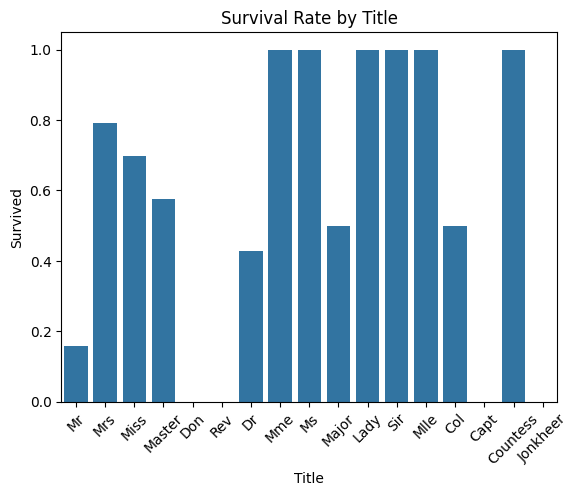

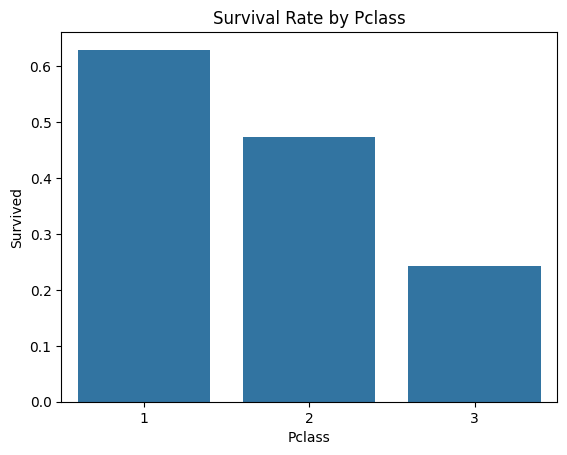

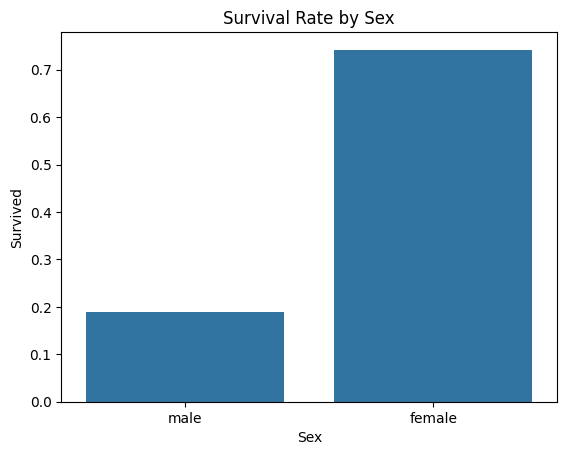

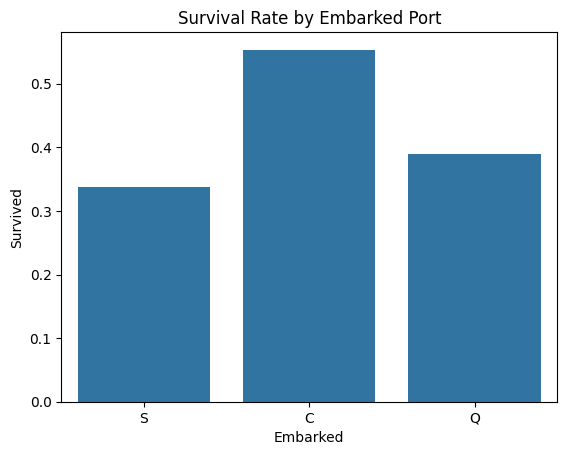

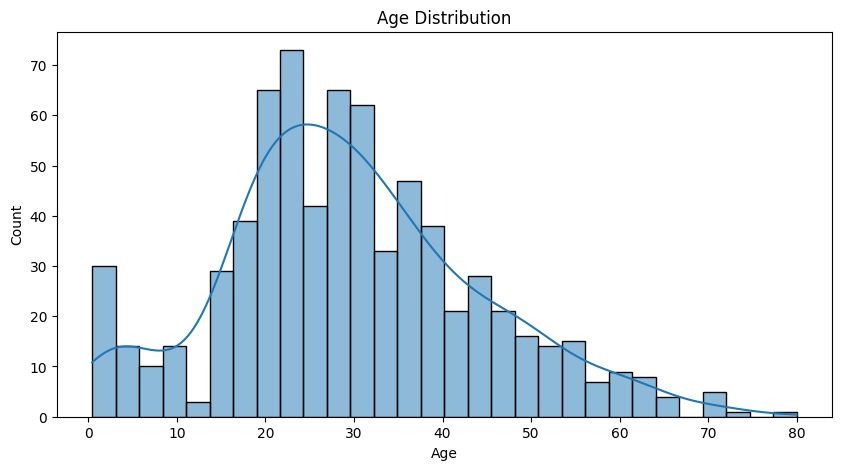

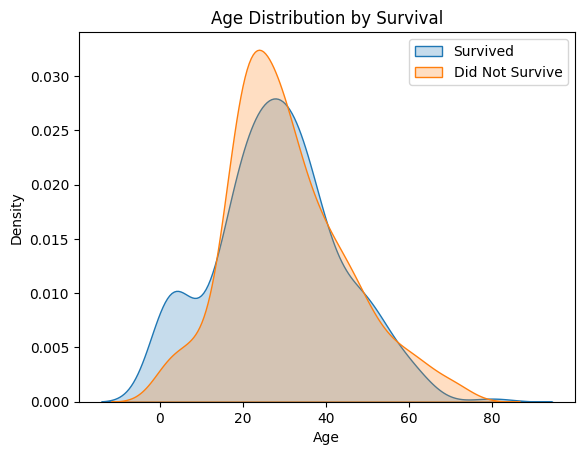

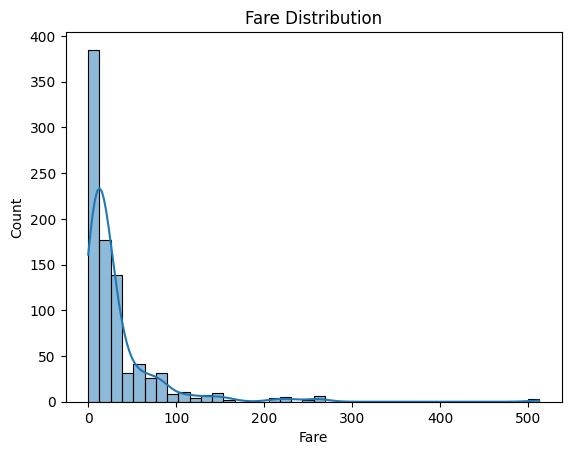

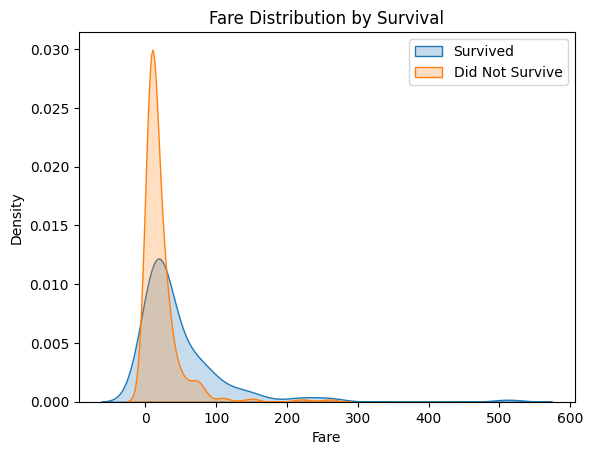

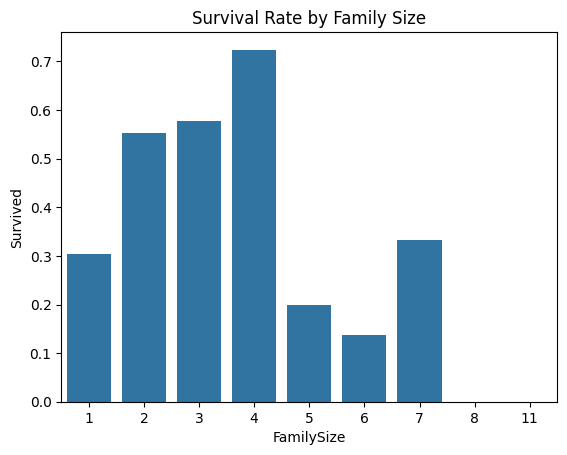

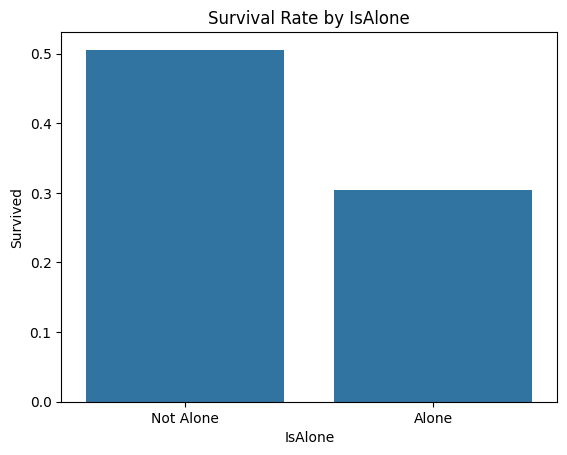

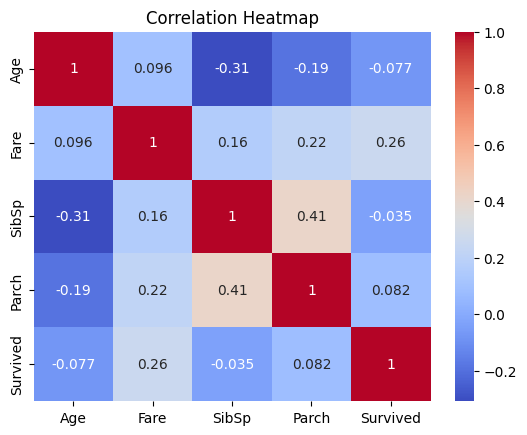

In [3]:
# Combine train and test for consistent EDA
# df = pd.concat([train, test], sort=False)
df = train

print("🚢 Titanic Dataset EDA")
print(f"Train shape: {train.shape}, Test shape: {test.shape}")
print(f"Combined shape: {df.shape}")

# ===== 1. Missing Values =====
print("\n🔍 Missing Values (%):")
print(df.isnull().mean().sort_values(ascending=False) * 100)

# ===== 2. Target Distribution =====
sns.countplot(data=train, x='Survived')
plt.title('Survival Distribution')
plt.show()
print(train['Survived'].value_counts(normalize=True))

# ===== 3. Basic Statistics =====
display(df.describe(include='all'))

# ===== 4. Title Extraction =====
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
title_counts = df['Title'].value_counts()
print("\nTitle Frequencies:")
print(title_counts)

plt.figure(figsize=(10, 5))
sns.countplot(data=df[df['Title'].notnull()], y='Title', order=title_counts.index)
plt.title('Distribution of Titles')
plt.show()

# ===== 5. Titles vs Survival =====
title_survival = train.copy()
title_survival['Title'] = title_survival['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
sns.barplot(data=title_survival, x='Title', y='Survived', estimator=np.mean, ci=None)
plt.xticks(rotation=45)
plt.title('Survival Rate by Title')
plt.show()

# ===== 6. Pclass vs Survival =====
sns.barplot(data=train, x='Pclass', y='Survived', ci=None)
plt.title('Survival Rate by Pclass')
plt.show()

# ===== 7. Sex vs Survival =====
sns.barplot(data=train, x='Sex', y='Survived', ci=None)
plt.title('Survival Rate by Sex')
plt.show()

# ===== 8. Embarked vs Survival =====
sns.barplot(data=train, x='Embarked', y='Survived', ci=None)
plt.title('Survival Rate by Embarked Port')
plt.show()

# ===== 9. Age Distribution =====
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# Age vs Survival
sns.kdeplot(data=train[train['Survived'] == 1], x='Age', label='Survived', fill=True)
sns.kdeplot(data=train[train['Survived'] == 0], x='Age', label='Did Not Survive', fill=True)
plt.legend()
plt.title('Age Distribution by Survival')
plt.show()

# ===== 10. Fare Distribution =====
sns.histplot(data=df, x='Fare', bins=40, kde=True)
plt.title('Fare Distribution')
plt.show()

# Fare vs Survival
sns.kdeplot(data=train[train['Survived'] == 1], x='Fare', label='Survived', fill=True)
sns.kdeplot(data=train[train['Survived'] == 0], x='Fare', label='Did Not Survive', fill=True)
plt.legend()
plt.title('Fare Distribution by Survival')
plt.show()

# ===== 11. Family Features =====
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

sns.barplot(data=train.assign(FamilySize=train['SibSp'] + train['Parch'] + 1),
            x='FamilySize', y='Survived', ci=None)
plt.title('Survival Rate by Family Size')
plt.show()

sns.barplot(data=train.assign(IsAlone=(train['SibSp'] + train['Parch'] == 0).astype(int)),
            x='IsAlone', y='Survived', ci=None)
plt.title('Survival Rate by IsAlone')
plt.xticks([0, 1], ['Not Alone', 'Alone'])
plt.show()

# ===== 12. Heatmap of Correlations =====
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch', 'Survived']
sns.heatmap(train[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
